In [33]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.utils
import torch.utils.data
import torchvision
import torch.nn.functional as F
import numpy as np
from numpy import nan
from pandas import read_csv

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from datetime import datetime
import holidays

from sympy import init_printing, Matrix
import seaborn as sns

import sys
import tqdm

In [19]:
# load all data
dataset = read_csv('household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'Datetime':[0,1]}, index_col=['Datetime'])
# summarize
print(dataset.shape)
print(dataset.head())
# mark all missing values
dataset.replace('?', nan, inplace=True)
# add a column for for the remainder of sub metering
values = dataset.values.astype('float32')
dataset['Sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])
# save updated dataset
dataset.to_csv('household_power_consumption.csv')

/tmp/ipykernel_1525541/1780099595.py:2: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  dataset = read_csv('household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'Datetime':[0,1]}, index_col=['Datetime'])
/tmp/ipykernel_1525541/1780099595.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataset = read_csv('household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'Datetime':[0,1]}, index_col=['Datetime'])
/tmp/ipykernel_1525541/1780099595.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was speci

(2075259, 7)
                    Global_active_power Global_reactive_power  Voltage  \
Datetime                                                                 
2006-12-16 17:24:00               4.216                 0.418  234.840   
2006-12-16 17:25:00               5.360                 0.436  233.630   
2006-12-16 17:26:00               5.374                 0.498  233.290   
2006-12-16 17:27:00               5.388                 0.502  233.740   
2006-12-16 17:28:00               3.666                 0.528  235.680   

                    Global_intensity Sub_metering_1 Sub_metering_2  \
Datetime                                                             
2006-12-16 17:24:00           18.400          0.000          1.000   
2006-12-16 17:25:00           23.000          0.000          1.000   
2006-12-16 17:26:00           23.000          0.000          2.000   
2006-12-16 17:27:00           23.000          0.000          1.000   
2006-12-16 17:28:00           15.800          0.

/tmp/ipykernel_1525541/404429038.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])


                     Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
datetime                                                                
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00          

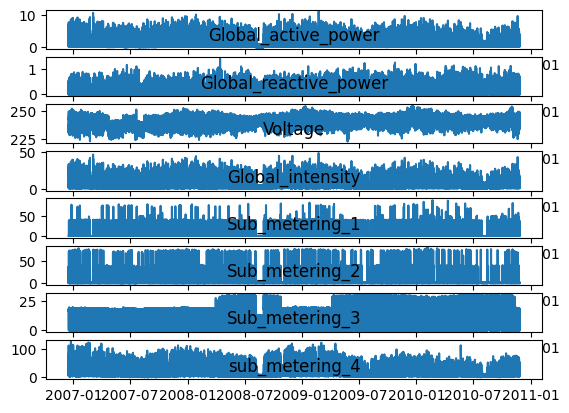

In [2]:
# load the new dataset and summarize
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
print(dataset.head())

plt.figure()
for i in range(len(dataset.columns)):
	plt.subplot(len(dataset.columns), 1, i+1)
	name = dataset.columns[i]
	plt.plot(dataset[name])
	plt.title(name, y=0)
plt.show()

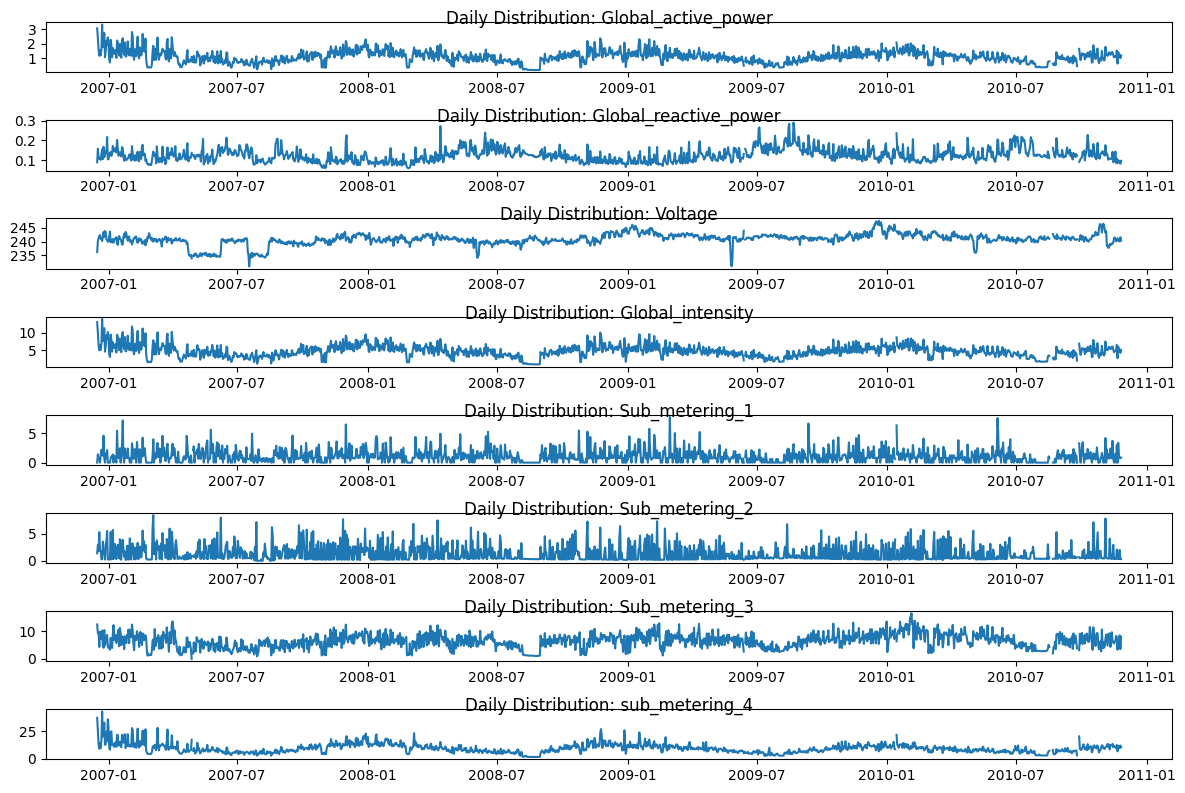

In [3]:
# Plot daily distribution
plt.figure(figsize=(12, 8))
daily_data = dataset.resample('D').mean()  # Resample by day and calculate the mean
for i in range(len(daily_data.columns)):
    plt.subplot(len(daily_data.columns), 1, i + 1)
    name = daily_data.columns[i]
    plt.plot(daily_data.index, daily_data[name])
    plt.title(f'Daily Distribution: {name}', y=0.8)
plt.tight_layout()
plt.show()

/tmp/ipykernel_1525541/1394378584.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = dataset.resample('H').mean()  # Resample by hour and calculate the mean


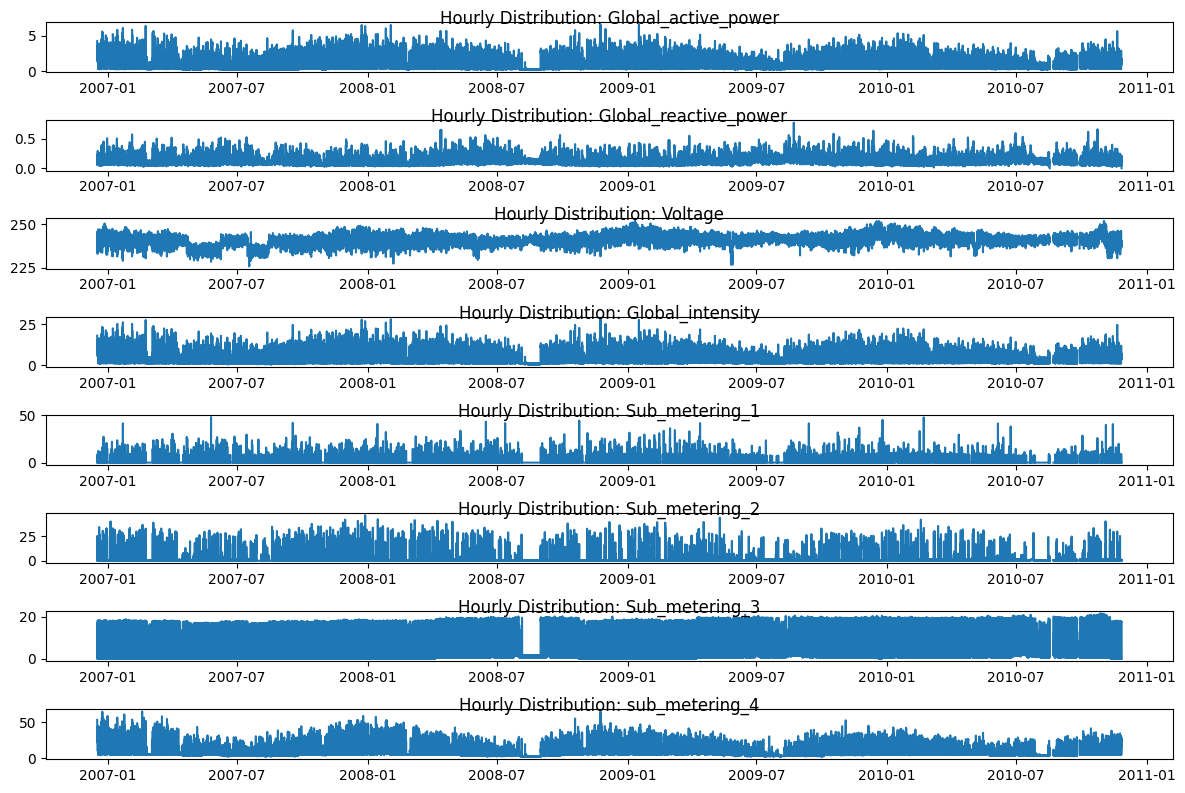

In [4]:
# Plot hourly distribution
plt.figure(figsize=(12, 8))
hourly_data = dataset.resample('H').mean()  # Resample by hour and calculate the mean
for i in range(len(hourly_data.columns)):
    plt.subplot(len(hourly_data.columns), 1, i + 1)
    name = hourly_data.columns[i]
    plt.plot(hourly_data.index, hourly_data[name])
    plt.title(f'Hourly Distribution: {name}', y=0.8)
plt.tight_layout()
plt.show()

/tmp/ipykernel_1525541/404429038.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])


                     Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
datetime                                                                
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00          

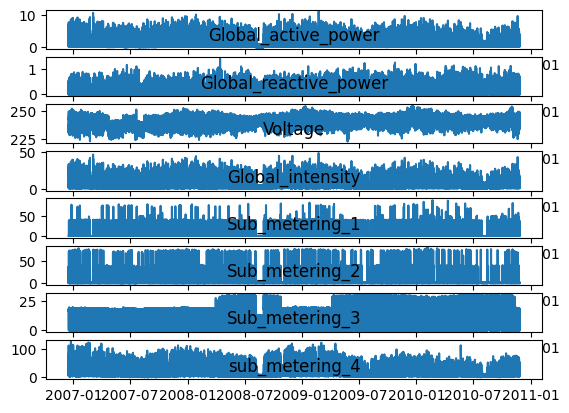

In [5]:
# load the new dataset and summarize
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
print(dataset.head())

plt.figure()
for i in range(len(dataset.columns)):
	plt.subplot(len(dataset.columns), 1, i+1)
	name = dataset.columns[i]
	plt.plot(dataset[name])
	plt.title(name, y=0)
plt.show()

/tmp/ipykernel_1264231/1740800889.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])


Matrix([
[  1.0,  0.247,   -0.4,  0.999,  0.484,  0.435,  0.639,  0.701],
[0.247,    1.0, -0.112,  0.266,  0.123,  0.139, 0.0896,  0.212],
[ -0.4, -0.112,    1.0, -0.411, -0.196, -0.167, -0.268, -0.271],
[0.999,  0.266, -0.411,    1.0,  0.489,   0.44,  0.627,  0.703],
[0.484,  0.123, -0.196,  0.489,    1.0, 0.0547,  0.103,  0.125],
[0.435,  0.139, -0.167,   0.44, 0.0547,    1.0, 0.0809, 0.0852],
[0.639, 0.0896, -0.268,  0.627,  0.103, 0.0809,    1.0,  0.179],
[0.701,  0.212, -0.271,  0.703,  0.125, 0.0852,  0.179,    1.0]])

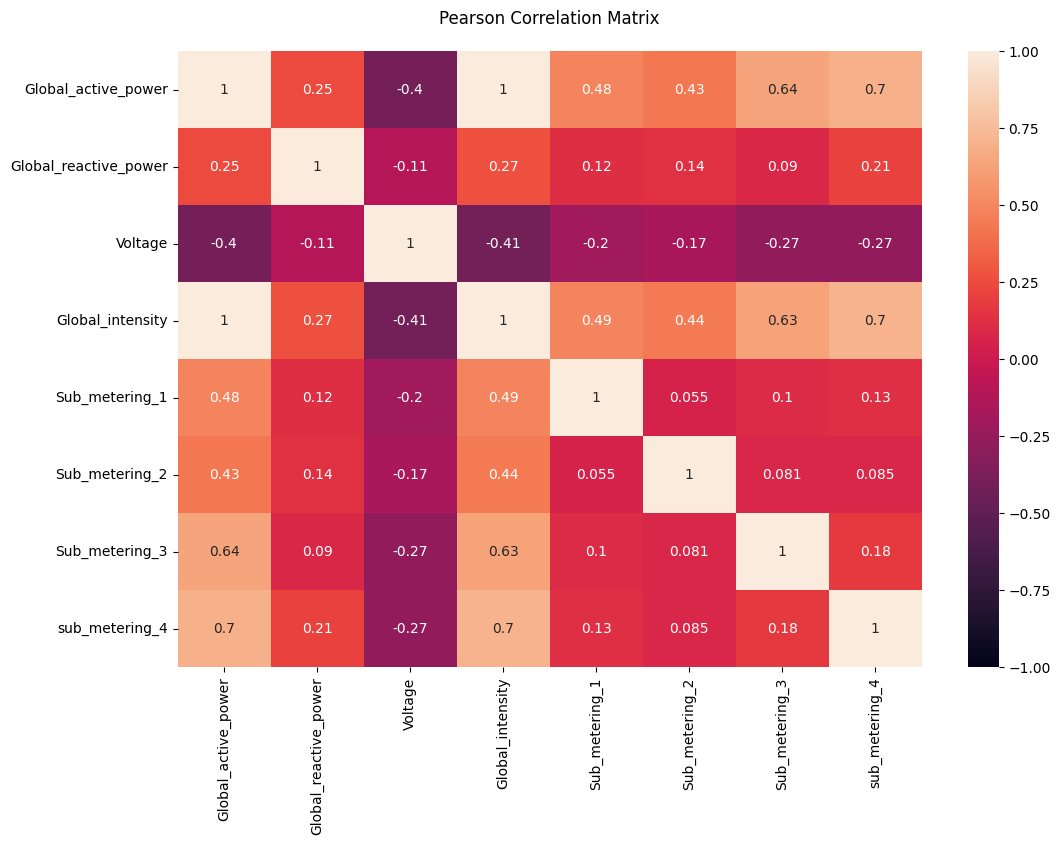

In [7]:
# load the new dataset and summarize
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
#print(dataset.columns)
#plot the pearson correlation matrix of the dataset which shows the correlation between the variables and labels them accordingly
correlation = dataset.corr()
#pretty print the correlation matrix here
display(Matrix(correlation).evalf(3))
# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)
plt.title('Pearson Correlation Matrix', pad=20)
plt.show()


/tmp/ipykernel_1264231/4272136890.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datasetm = dataset.resample('M').mean()
/tmp/ipykernel_1264231/4272136890.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dataseth = dataset.resample('H').mean()


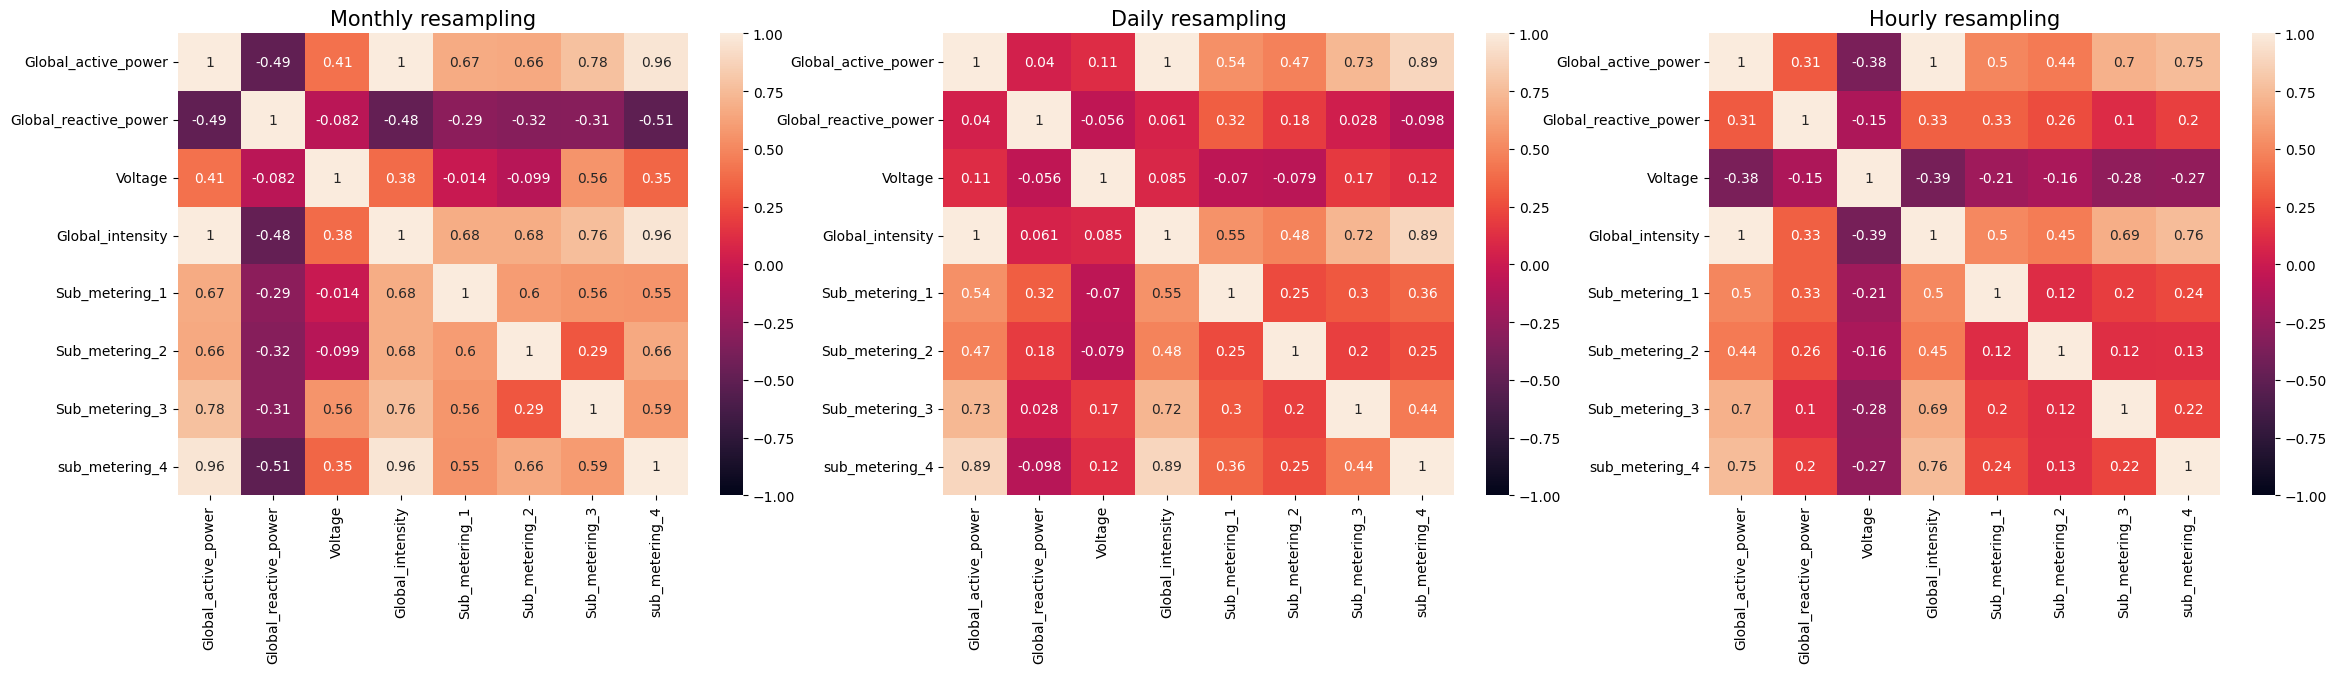

In [8]:
f= plt.figure(figsize=(28,6))

ax=f.add_subplot(131)
datasetm = dataset.resample('M').mean()
sns.heatmap(datasetm.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Monthly resampling', size=15)

ax=f.add_subplot(132)
datasetd = dataset.resample('D').mean()
sns.heatmap(datasetd.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Daily resampling', size=15)
  
ax=f.add_subplot(133)
dataseth = dataset.resample('H').mean()
sns.heatmap(dataseth.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Hourly resampling', size=15)
plt.show()

In [ ]:
# load the new dataset and summarize
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
#show number of missing values in each column
dataset.isnull().sum()

/tmp/ipykernel_1264231/3541668190.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])


                     Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
datetime                                                                
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00          

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
sub_metering_4           25979
dtype: int64

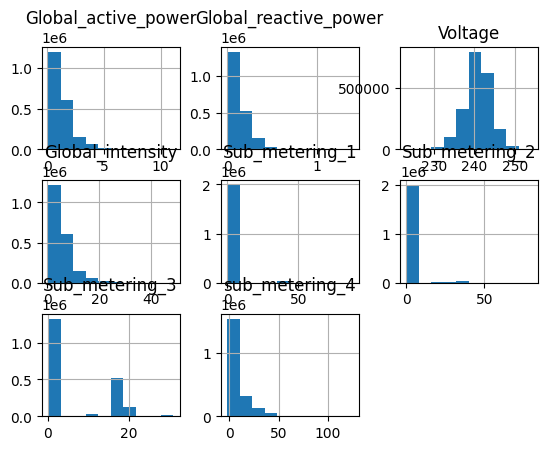

Since most of these distributions aren't normally distributed, we can't use the mean to fill in the missing values. We could use a median instead. Additionnally, normalization of the dataset can be done but standardization shoudl be avoided here as it will make the data more Gaussian-like and this is not the case for this dataset.


In [11]:
#show the distrbution of all values in the dataset
dataset.hist()
plt.show()
print("Since most of these distributions aren't normally distributed, we can't use the mean to fill in the missing values. We could use a median instead. Additionnally, normalization of the dataset can be done but standardization shoudl be avoided here as it will make the data more Gaussian-like and this is not the case for this dataset.")

In [ ]:
print("In any case, we will either use MinMaxScaler or RobustScaler to normalize the data. We will also use the median to fill in the missing values udring imputation of the dataset.")
#for the time, we will make a dumb LSTM model with no data processing for now for comparaison purposes

#we will create a sanatized version of the dataset, seperate from the original one and compare the two

# Load dataset
df = pd.read_csv("household_power_consumption.txt", sep=';', header=0, low_memory=False)
print(df.columns)

# Combine Date and Time manually
df = df.assign(Datetime=pd.to_datetime(df["Date"] + " " + df["Time"], format="%d/%m/%Y %H:%M:%S", errors="coerce"))

# Drop original Date and Time columns (optional)
df.drop(columns=["Date", "Time"], inplace=True)

# Set index if needed
#df.set_index("Datetime", inplace=True)

print(df.head())

# Define numerical columns
numeric_cols = ["Global_active_power", "Global_reactive_power", "Voltage",
                "Global_intensity", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]

df.replace('?', nan, inplace=True)

for col in numeric_cols:
    df[col] = df[col].astype(float)

# Add a column for the remainder of sub metering
df['Sub_metering_4'] = (df["Global_active_power"] * 1000 / 60) - (df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3'])

# Daily differencing
df["Global_active_power_daily_diff"] = df["Global_active_power"].diff(periods=24*60)

# Annual differencing
df["Global_active_power_annual_diff"] = df["Global_active_power"].diff(periods=24*60*365)

added_cols = ["Sub_metering_4", "Global_active_power_daily_diff", "Global_active_power_annual_diff"]

for col in added_cols:
    df[col] = df[col].astype(float)
    
# Ensure Datetime is sorted
df = df.sort_values("Datetime")

# Compute energy consumption at different time scales
df["Hourly_Consumption"] = df["Global_active_power"]
df["Daily_Consumption"] = df.groupby(df["Datetime"].dt.date)["Global_active_power"].transform("sum")
df["Monthly_Consumption"] = df.groupby(df["Datetime"].dt.to_period("M"))["Global_active_power"].transform("sum")

# Create target columns (future predictions), better to include them now for normalization and scaling later after splitting the data
df["Next_Day_Hourly_Consumption"] = df["Hourly_Consumption"].shift(-24)  # Next day's same hour
df["Next_Week_Daily_Consumption"] = df["Daily_Consumption"].shift(-7)    # Daily for next week
df["Next_Month_Daily_Consumption"] = df["Daily_Consumption"].shift(-30)  # Daily for next month
df["Next_Year_Monthly_Consumption"] = df["Monthly_Consumption"].shift(-365)  # Monthly for next year

# Impute missing values and create missing indicators
for col in numeric_cols + added_cols:
    df[f"{col}_was_missing"] = df[col].isna()  # Boolean flag for missing values
    #imputation should be done after splitting the data into training and testing sets
    #df.fillna({col: df[col].median()}, inplace=True)  # Median imputation

print(df.columns)

# Sort by datetime (in case it's unordered)
df.sort_values("Datetime", inplace=True)

# Create new time-based features
df["Hour"] = df["Datetime"].dt.hour
df["Weekday"] = df["Datetime"].dt.weekday  # 0=Monday, 6=Sunday
df["Is_Weekend"] = df["Weekday"] >= 5

# Add French holiday feature
fr_holidays = holidays.FR()
df["Is_Holiday"] = df["Datetime"].dt.date.astype(str).apply(lambda x: x in fr_holidays)

# add season feature
df["Season"] = df["Datetime"].dt.month.apply(lambda x: (x % 12 + 3) // 3)

#move datetime to front of the dataframe
cols = list(df)
cols.insert(0, cols.pop(cols.index('Datetime')))
df = df.loc[:, cols]

# Save the updated dataset
df.to_csv("household_power_consumption_processed_with_features.csv", index=False)

print("Dataset updated and saved as household_power_consumption_processed_with_features.csv")


In any case, we will either use MinMaxScaler or RobustScaler to normalize the data. We will also use the median to fill in the missing values udring imputation of the dataset.
Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')
  Global_active_power Global_reactive_power  Voltage Global_intensity  \
0               4.216                 0.418  234.840           18.400   
1               5.360                 0.436  233.630           23.000   
2               5.374                 0.498  233.290           23.000   
3               5.388                 0.502  233.740           23.000   
4               3.666                 0.528  235.680           15.800   

  Sub_metering_1 Sub_metering_2  Sub_metering_3            Datetime  
0          0.000          1.000            17.0 2006-12-16 17:24:00  
1          0.000          1.000            16.0 2006

Datetime                                            0
Global_active_power                             25979
Global_reactive_power                           25979
Voltage                                         25979
Global_intensity                                25979
Sub_metering_1                                  25979
Sub_metering_2                                  25979
Sub_metering_3                                  25979
Sub_metering_4                                  25979
Global_active_power_daily_diff                  37391
Global_active_power_annual_diff                555992
Hourly_Consumption                              25979
Daily_Consumption                                   0
Monthly_Consumption                                 0
Next_Day_Hourly_Consumption                     26003
Next_Week_Daily_Consumption                         7
Next_Month_Daily_Consumption                       30
Next_Year_Monthly_Consumption                     365
Global_active_power_was_miss

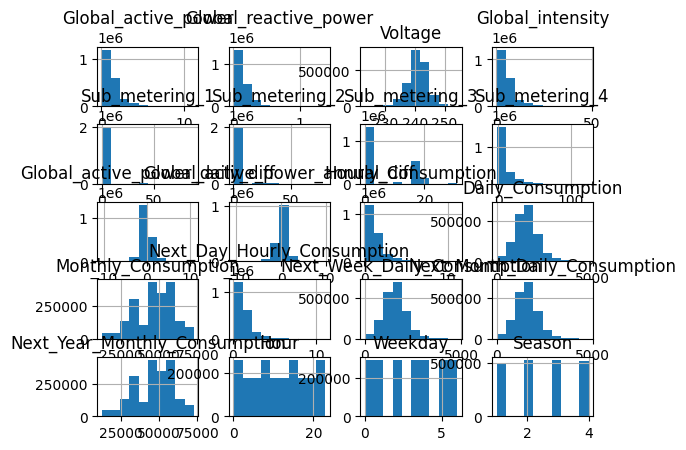

In [15]:
# load the new dataset and summarize
dataset = read_csv('household_power_consumption_processed_with_features.csv', header=0)
#show number of missing values in each column
print(dataset.isnull().sum())
mm_scaler = MinMaxScaler()
r_scaler = RobustScaler()
imputer = SimpleImputer(strategy='median')
# Apply winsorization (clipping the top and bottom 0.1%) which helps to reduce the effect of outliers, will be done after splitting and before the scaling
#lower_percentile = 0.1
#upper_percentile = 99.9
#
#for col in numeric_cols:
#    lower_limit = np.percentile(df[col], lower_percentile)
#    upper_limit = np.percentile(df[col], upper_percentile)
#    
#    # Clip values outside the 0.1% and 99.9% range
#    df[col] = np.clip(df[col], lower_limit, upper_limit)
dataset.hist()
plt.show()


Matrix([
[    1.0,   0.247,    -0.4,    0.999,   0.484,     0.435,   0.639,   0.701,     0.58,    0.557,     1.0,     0.392,     0.252,     0.282,   0.0658,    0.0846,   -0.0028,    -0.127],
[  0.247,     1.0,  -0.112,    0.266,   0.123,     0.139,  0.0896,   0.212,    0.182,    0.192,   0.247,    0.0112,    -0.104,     0.128,   0.0695,    0.0889,   0.00809,    0.0585],
[   -0.4,  -0.112,     1.0,   -0.411,  -0.196,    -0.167,  -0.268,  -0.271,    -0.21,   -0.221,    -0.4,    0.0752,      0.19,    -0.176,  -0.0214,   -0.0217,    0.0137,    -0.154],
[  0.999,   0.266,  -0.411,      1.0,   0.489,      0.44,   0.627,   0.703,    0.581,    0.558,   0.999,     0.386,     0.242,     0.282,   0.0672,    0.0865,  -0.00281,    -0.121],
[  0.484,   0.123,  -0.196,    0.489,     1.0,    0.0547,   0.103,   0.125,    0.349,    0.339,   0.484,    0.0972,     0.039,     0.108,    0.053,    0.0652,   0.00866,   -0.0126],
[  0.435,   0.139,  -0.167,     0.44,  0.0547,       1.0,  0.0809,  0.0852,    0.

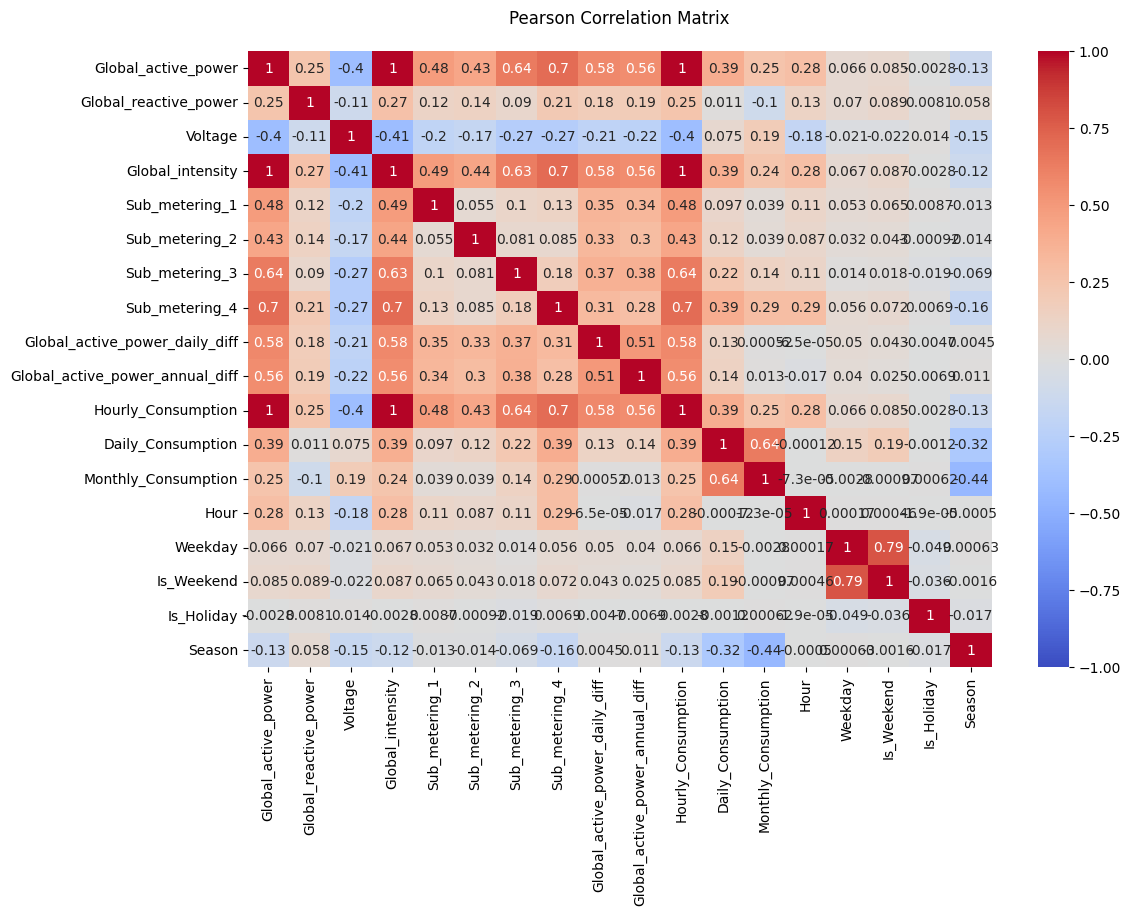

In [19]:
features = ["Next_Day_Hourly_Consumption", "Next_Week_Daily_Consumption",
                          "Next_Month_Daily_Consumption", "Next_Year_Monthly_Consumption", "Datetime"]

predictors = {"hourly":"Next_Day_Hourly_Consumption", "weekly":"Next_Week_Daily_Consumption",
              "monthly":"Next_Month_Daily_Consumption", "yearly":"Next_Year_Monthly_Consumption"}

copy = dataset.loc[:, ~dataset.columns.str.contains("was_missing")]
copy = copy.drop(columns=features)
correlation = copy.corr()
#pretty print the correlation matrix here
display(Matrix(correlation).evalf(3))
# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Matrix', pad=20)
plt.show()

In [ ]:
def create_sliding_windows(data, target_column, window_size):
    X, y = [], []
    
    for i in range(len(data) - window_size):
        X.append(data.iloc[i:i + window_size].values)  # Window of values
        y.append(data.iloc[i + window_size][target_column])  # Next value
    
    return np.array(X), np.array(y)

In [21]:
from sklearn.model_selection import train_test_split

train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

X = dataset.drop(columns=features)
y = dataset[predictors["hourly"]] # hourly consumption prediction

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, shuffle=False)

x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), shuffle=False) 

print(x_train, x_val, x_test)

         Global_active_power  Global_reactive_power  Voltage  \
673458                 3.930                  0.168   236.50   
1639742                1.382                  0.000   244.86   
600727                 4.730                  0.000   233.09   
1556632                1.100                  0.050   240.85   
713761                 1.332                  0.000   241.95   
...                      ...                    ...      ...   
1007600                1.602                  0.126   236.51   
235224                 0.234                  0.048   238.29   
1759007                0.362                  0.098   240.30   
1189095                0.314                  0.112   243.33   
1782365                1.508                  0.182   234.13   

         Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
673458               16.6            37.0             0.0            17.0   
1639742               5.6             0.0             0.0            19.0   


In [26]:
# We perform the imputation and scaling after splitting the data to avoid data leakage

# Imputation and scaling minmax (mm)
mm_x_train = imputer.fit_transform(x_train)
mm_x_train = mm_scaler.fit_transform(mm_x_train)
mm_x_train = pd.DataFrame(mm_x_train, columns=x_train.columns)

mm_x_val = imputer.transform(x_val)
mm_x_val = mm_scaler.transform(mm_x_val)
mm_x_val = pd.DataFrame(mm_x_val, columns=x_val.columns)

mm_x_test = imputer.transform(x_test)
mm_x_test = mm_scaler.transform(mm_x_test)
mm_x_test = pd.DataFrame(mm_x_test, columns=x_test.columns)

In [28]:
print(mm_x_train.isnull().sum())

Global_active_power                            0
Global_reactive_power                          0
Voltage                                        0
Global_intensity                               0
Sub_metering_1                                 0
Sub_metering_2                                 0
Sub_metering_3                                 0
Sub_metering_4                                 0
Global_active_power_daily_diff                 0
Global_active_power_annual_diff                0
Hourly_Consumption                             0
Daily_Consumption                              0
Monthly_Consumption                            0
Global_active_power_was_missing                0
Global_reactive_power_was_missing              0
Voltage_was_missing                            0
Global_intensity_was_missing                   0
Sub_metering_1_was_missing                     0
Sub_metering_2_was_missing                     0
Sub_metering_3_was_missing                     0
Sub_metering_4_was_m

In [29]:
# Imputation and scaling robust (r)
r_x_train = imputer.fit_transform(x_train)
r_x_train = r_scaler.fit_transform(r_x_train)
r_x_train = pd.DataFrame(r_x_train, columns=x_train.columns)

r_x_val = imputer.transform(x_val)
r_x_val = r_scaler.transform(r_x_val)
r_x_val = pd.DataFrame(r_x_val, columns=x_val.columns)

r_x_test = imputer.transform(x_test)
r_x_test = r_scaler.transform(r_x_test)
r_x_test = pd.DataFrame(r_x_test, columns=x_test.columns)

In [30]:
print(r_x_train.isnull().sum())

Global_active_power                            0
Global_reactive_power                          0
Voltage                                        0
Global_intensity                               0
Sub_metering_1                                 0
Sub_metering_2                                 0
Sub_metering_3                                 0
Sub_metering_4                                 0
Global_active_power_daily_diff                 0
Global_active_power_annual_diff                0
Hourly_Consumption                             0
Daily_Consumption                              0
Monthly_Consumption                            0
Global_active_power_was_missing                0
Global_reactive_power_was_missing              0
Voltage_was_missing                            0
Global_intensity_was_missing                   0
Sub_metering_1_was_missing                     0
Sub_metering_2_was_missing                     0
Sub_metering_3_was_missing                     0
Sub_metering_4_was_m

In [35]:
#idea: could resample the data over 10 minutes, 1 hour, 1 day to reduce the number of samples and make the model more efficient with less computation

class LSTM(nn.Module):

    def __init__(self,
                 hidden_size,
                 in_size = 1,
                 out_size = 1):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(
            input_size = in_size,
            hidden_size = hidden_size,
            batch_first = True)
        self.fc = nn.Linear(hidden_size, out_size)

    def forward(self, x, h = None):
        out, h = self.lstm(x, h)
        last_hidden_states = out[:, -1]
        out = self.fc(last_hidden_states)
        return out, h

In [36]:
# size of LSTM hidden state
LSTM_HIDDEN_SIZE = 24

# Optimizer learning rate
LEARNING_RATE = 0.02

TRAINING_EPOCHS = 100

In [37]:
# Initializing the model
model = LSTM(hidden_size = LSTM_HIDDEN_SIZE)
model.train()

LSTM(
  (lstm): LSTM(1, 24, batch_first=True)
  (fc): Linear(in_features=24, out_features=1, bias=True)
)

In [38]:
OPTIMIZER = torch.optim.Adam(params = model.parameters(), lr = LEARNING_RATE)
MSE_LOSS = torch.nn.MSELoss()
device = "cuda" if torch.cuda.is_available() else "cpu"

In [34]:
def train_lstm_model(model, x_train, y_train, x_val, y_val, x_test, y_test, 
                      scaler, optimizer, loss_fn, epochs=100, device="cpu"):
    """
    Trains an LSTM model and evaluates it on validation and test sets.
    
    Parameters:
        model (torch.nn.Module): LSTM model
        x_train (torch.Tensor): Training input
        y_train (torch.Tensor): Training target
        x_val (torch.Tensor): Validation input
        y_val (torch.Tensor): Validation target
        x_test (torch.Tensor): Test input
        y_test (torch.Tensor): Test target
        scaler (sklearn.preprocessing.StandardScaler): Scaler for inverse transform
        optimizer (torch.optim.Optimizer): Optimizer for training
        loss_fn (callable): Loss function
        epochs (int): Number of training epochs (default=100)
        device (str): Device to train on ('cpu' or 'cuda')

    Returns:
        best_model (torch.nn.Module): The best trained model
        training_loss (list): Training loss history
        validation_loss (list): Validation loss history
    """

    model.to(device)
    x_train, y_train = x_train.to(device), y_train.to(device)
    x_val, y_val = x_val.to(device), y_val.to(device)

    best_model = None
    min_val_loss = sys.maxsize

    training_loss = []
    validation_loss = []
    
    progress_bar = tqdm(range(epochs), desc="Training Progress", unit="epoch")

    for epoch in progress_bar:
        model.train()
        
        # Forward pass
        prediction, _ = model(x_train)
        loss = loss_fn(prediction, y_train)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Validation
        model.eval()
        with torch.no_grad():
            val_prediction, _ = model(x_val)
            val_loss = loss_fn(val_prediction, y_val)

        training_loss.append(loss.item())
        validation_loss.append(val_loss.item())

        # Save the best model based on validation loss
        if val_loss.item() < min_val_loss:
            best_model = copy.deepcopy(model)
            min_val_loss = val_loss.item()

        # Print progress every 10 epochs
        if epoch % 10 == 0:
            print(f'Epoch {epoch}: Train Loss = {round(loss.item(), 4)}, '
                  f'Val Loss = {round(val_loss.item(), 4)}')

    # Evaluation on test set
    best_model.eval()
    with torch.no_grad():
        _, h_list = best_model(x_val)
        
        # Warm-up hidden and cell states
        h = tuple([(h[-1, -1, :]).unsqueeze(-2).unsqueeze(-2) for h in h_list])

        predicted = []
        progress_bar = tqdm(x_test.tolist(), desc="Validation", unit="sequence")
        for test_seq in progress_bar:
            x = torch.tensor([test_seq], dtype=torch.float32, device=device)
            y, h = best_model(x, h)
            
            # Inverse transform to get real values
            unscaled = scaler.inverse_transform(np.array(y.item()).reshape(-1, 1))[0][0]
            predicted.append(unscaled)

    # Inverse transform actual test values
    real = scaler.inverse_transform(y_test.cpu().tolist())

    # Plot test predictions
    plt.figure(figsize=(10, 4))
    plt.title("Test Dataset Predictions")
    plt.plot(real, label='Real')
    plt.plot(predicted, label='Predicted')
    plt.legend()
    plt.show()

    # Plot training and validation loss
    plt.figure(figsize=(10, 4))
    plt.title('Training Loss Curve')
    plt.yscale('log')
    plt.plot(training_loss, label='Training')
    plt.plot(validation_loss, label='Validation')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    return best_model, training_loss, validation_loss


In [ ]:
#best_model, train_loss, val_loss = train_lstm_model(
#    model, x_train, y_train, x_val, y_val, x_test, y_test, 
#    scaler, optimizer, loss_fn, epochs=100, device=device
#)